In [268]:
# Libraries
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Extend PATH Variable
import sys
sys.path.append("src/")

# NanoNets Simulation Tool
import nanonets

Init disordered Network Topology and Electrostatic Properties:
- Number of nanopartciles $N_{NP}$ and number of junctions per $N_{J}$
- Electrode Positions as list of cartesian coordinates `[[x_1, y_1], [x_2, y_2], [x_3, y_3], ...]` \
Network is placed inside box of size 1 with electrodes attached to closest nanoparticle

In [269]:
# Network Style
network_topology = "random"

# Network Parameter
topology_parameter  = {
    "Np"    : 5,
    "Nj"    : 4,
    "e_pos" : [[-1,-1],[1,1]]
}

# Save Folder
folder  = "test_runs/"

# Topology Class
np_network_sim = nanonets.simulation(network_topology=network_topology, folder=folder, topology_parameter=topology_parameter)

Display Network Topology

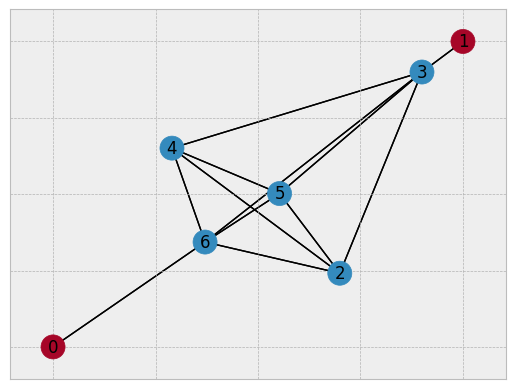

In [270]:
# Node Positions
fixed_pos                               = {i : val for i, val in enumerate(topology_parameter["e_pos"])}
pos                                     = nx.spring_layout(G=np_network_sim.G, pos=fixed_pos, fixed=[i for i in range(np_network_sim.N_electrodes)])
pos_vals                                = np.array(list(dict(sorted(pos.items())).values()))
pos_vals_e                              = pos_vals[np_network_sim.N_electrodes:]
pos_vals_e                              = 1.6*(pos_vals_e - np.min(pos_vals_e,axis=0))/(np.max(pos_vals_e,axis=0) - np.min(pos_vals_e,axis=0)) - 0.8
pos_vals[np_network_sim.N_electrodes:]  = pos_vals_e

for i in range(np_network_sim.N_particles):
    pos[i] = pos_vals[i,:]

# Node Colors
colors                                  = np.repeat('#348ABD', np_network_sim.N_particles+np_network_sim.N_electrodes)
colors[-np_network_sim.N_electrodes:]   = '#A60628'

# Display Graph
with plt.style.context(["bmh"]):

    fig = plt.figure()
    ax  = fig.add_subplot()
    nx.draw_networkx(G=np_network_sim.G, pos=pos, ax=ax, node_color=colors, arrows=False)
    plt.show()



Input Voltages

Number of Steps: 20000


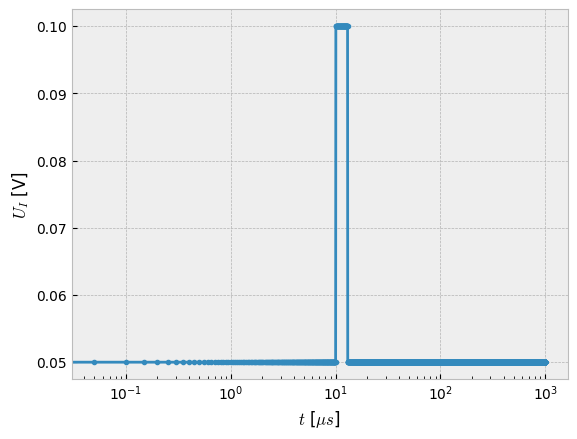

In [271]:
# Define Time Scale
step_size   = 5e-8
max_time    = 10e-4
time_steps  = np.arange(0,max_time,step_size)
N_steps     = len(time_steps)
print(f"Number of Steps: {N_steps}")

# Define Peak
t_min_peak  = 10e-6
t_max_peak  = 13e-6
peak_bounds = (time_steps >= t_min_peak) & (time_steps <= t_max_peak)

# Input Voltages
input_volt              = np.repeat(0.05,N_steps)
input_volt[peak_bounds] = 0.1

# Voltage Array
voltages        = np.zeros((N_steps, np_network_sim.N_electrodes+1))
voltages        = np.zeros((N_steps, np_network_sim.N_electrodes+1))
voltages[:,0]   = input_volt

# Plot
with plt.style.context("bmh"):
    
    plt.plot(time_steps*10**6, input_volt, '.-')
    plt.xlabel("$t$ [$\mu s$]")
    plt.ylabel("$U_I$ [V]")
    plt.xscale('log')
    plt.show()

In [272]:
store_per_it_min, store_per_it_max = 12e-6, 14e-6 #0,0
np_network_sim = nanonets.simulation(network_topology=network_topology, folder=folder, topology_parameter=topology_parameter)
np_network_sim.run_var_voltages(voltages=voltages, time_steps=time_steps, target_electrode=1, save_th=.1, store_per_it_min=store_per_it_min, store_per_it_max=store_per_it_max)

In [273]:
start_val   = 100

# Return Output Current
output_vals = np_network_sim.return_output_values()
output_I    = output_vals[:,2]/1000
output_I    = output_I[start_val:]

# Return Microstate
microstate  = np_network_sim.return_microstates()
microstate  = microstate[start_val:]

# Return Landscape
landscape   = np_network_sim.return_potential_landscape()
landscape   = landscape[start_val:]

# Return Network Currents
jump_paths, network_I   = np_network_sim.return_network_currents()
network_I               = network_I[start_val:]

# Return Network Currents
pot_per_it = np_network_sim.return_pot_per_it()

# Return Jumps per Iteration
jumps_per_it = np_network_sim.return_jumps_per_it()

# Return inner Time Evolution
time_per_it     = np_network_sim.return_time_vals()
stored_indices  = np.where((time_steps >= store_per_it_min) & (time_steps < store_per_it_max))[0]

In [274]:
print(f"Average Jumps per Step: {np.round(np.mean(output_vals[1:,1] - output_vals[:-1,1]),2)}")

Average Jumps per Step: 394.5


### Output electric Current

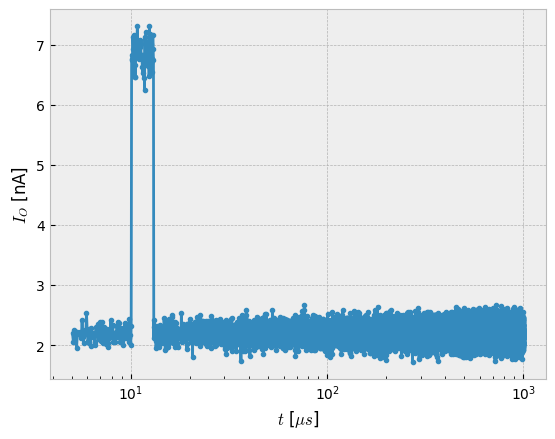

In [275]:
with plt.style.context("bmh"):
    
    plt.plot(time_steps[start_val+1:]*10**6, output_I, '.-')
    plt.xlabel("$t$ [$\mu s$]")
    plt.ylabel("$I_O$ [nA]")
    plt.xscale('log')
    plt.show()

#### Micro State

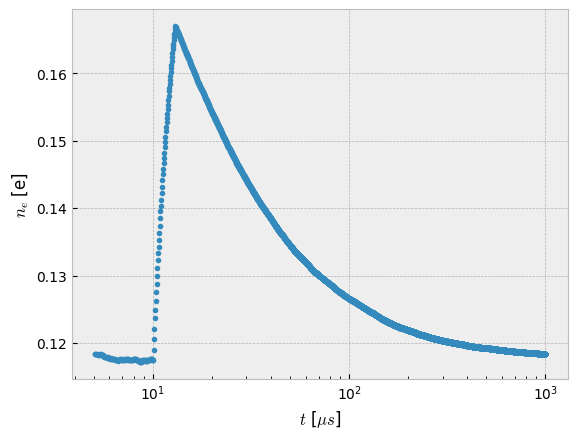

In [276]:
with plt.style.context("bmh"):
    
    plt.plot(time_steps[start_val+1:]*10**6, microstate[:,0], '.')
    # plt.plot(time_steps[1:]*10**6, microstate[:,-1], '.')
    plt.xlabel("$t$ [$\mu s$]")
    plt.ylabel("$n_e$ [e]")
    plt.xscale('log')
    plt.show()

#### NP Potential

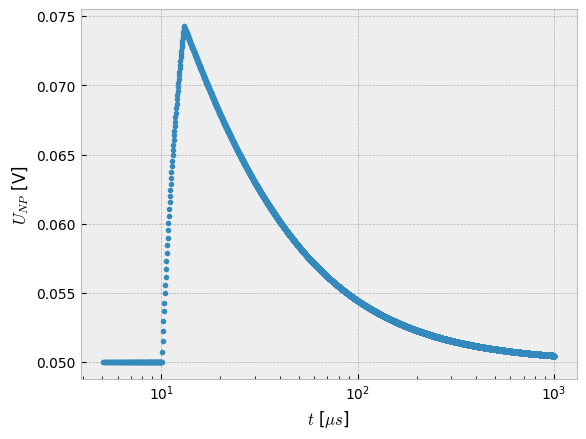

In [279]:
with plt.style.context("bmh"):
    
    plt.plot(time_steps[start_val+1:]*10**6, landscape[:,0], '.')
    # plt.plot(time_steps[1:]*10**6, microstate[:,-1], '.')
    plt.xlabel("$t$ [$\mu s$]")
    plt.ylabel("$U_{NP}$ [V]")
    plt.xscale('log')
    plt.show()

#### NP Current

In [ ]:
# with plt.style.context("bmh"):
    
#     plt.plot(time_steps[start_val+1:]*10**6, network_I[:,0], '.-')
#     plt.plot(time_steps[start_val+1:]*10**6, network_I[:,18], '.-')
#     # plt.plot(time_steps[1:]*10**6, microstate[:,-1], '.')
#     plt.xlabel("$t$ [$\mu s$]")
#     plt.ylabel("$U_{NP}$ [V]")
#     plt.xscale('log')
#     plt.show()

### Potential evolution

In [280]:
np_index        = 5
potential_evo   = [pot_per_it[i][1:,np_index] for i in stored_indices]
time_evo        = [time_per_it[i][1:] for i in stored_indices]

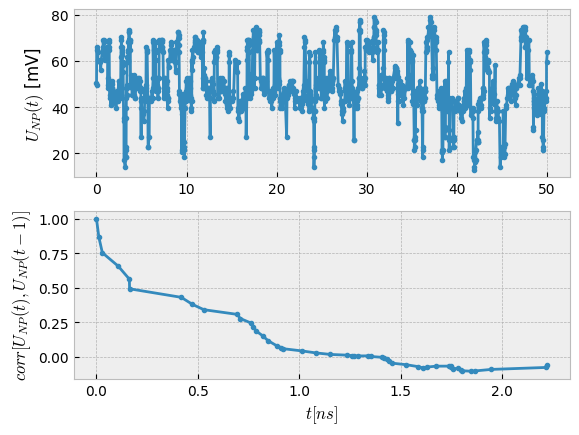

In [282]:
n_lags  = 50
t_range = 5
t       = time_evo[t_range] - np.min(time_evo[t_range])
arr     = potential_evo[t_range]
a_c     = [1. if t==0 else np.corrcoef(arr[:-t],arr[t:])[0,1] for t in range(n_lags)]

with plt.style.context("bmh"):
    
    fig = plt.figure()
    ax1 = fig.add_subplot(2,1,1)
    ax1.plot(t*10**9, 1000*potential_evo[t_range], '.-')
    ax1.set_ylabel("$U_{NP}(t)$ [mV]")

    ax2 = fig.add_subplot(2,1,2)
    ax2.plot(t[:n_lags]*10**9, a_c, '.-')
    ax2.set_ylabel("$corr[U_{NP}(t),U_{NP}(t-1)]$")
    ax2.set_xlabel("$t [ns]$")

    plt.show()

In [ ]:
jump_index      = 62
jumps_per_evo   = [jumps_per_it[i][1:,jump_index] for i in stored_indices]

In [ ]:
np.insert()

array([  0.,   0.,   0., ..., 169., 169., 169.])

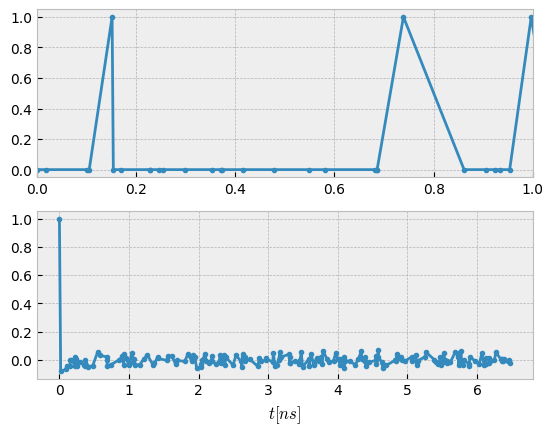

In [263]:
n_lags  = 200
t_range = 5
t       = time_evo[t_range] - np.min(time_evo[t_range])
arr2    = jumps_per_evo[t_range][1:] - jumps_per_evo[t_range][:-1]
arr2    = np.insert(arr2, 0, 0)
# arr2    = jumps_per_evo[t_range]
a_c_j   = [1. if t==0 else np.corrcoef(arr2[:-t],arr2[t:])[0,1] for t in range(n_lags)]

with plt.style.context("bmh"):
    
    fig = plt.figure()
    ax1 = fig.add_subplot(2,1,1)
    ax1.plot(t*10**9, arr2, '.-')
    # ax1.set_ylabel("$U_{NP}(t)$ [mV]")
    ax1.set_xlim(0,1)

    ax2 = fig.add_subplot(2,1,2)
    ax2.plot(t[:n_lags]*10**9, a_c_j, '.-')
    # ax2.set_ylabel("$corr[U_{NP}(t),U_{NP}(t-1)]$")
    ax2.set_xlabel("$t [ns]$")

    plt.show()

### Tunneling Evolution

In [264]:
arr2[arr2 > 0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [209]:
np_index        = 16
jumps_per_evo   = [jumps_per_it[i][1:,np_index] for i in stored_indices]

In [18]:
# with plt.style.context("bmh"):
    
#     plt.plot(input_volt[start_val+1:], output_I, '.')
#     plt.xlabel("$U_I$ [V]")
#     plt.ylabel("$I_O$ [nA]")
#     # plt.ylim(-8,8)
#     plt.show()